In [13]:
import pandas as pd   #판다스 데이터프레임 
import numpy as np   #넘파이 배열 
from matplotlib import pyplot as plt     #그래프 
import warnings 
import seaborn as sns # 시각화 라이브러리 
warnings.filterwarnings("ignore")

In [14]:
submit = pd.read_csv("./data/sampleSubmission.csv")

In [15]:
train=pd.read_csv("./train_jeoncheori1.csv")
test=pd.read_csv("./test_jeoncheori1.csv")

In [26]:
train["Weight_in_gms x Discount_offered"]= train["Weight_in_gms"] * train["Discount_offered"]
test["Weight_in_gms x Discount_offered"]= test["Weight_in_gms"] * test["Discount_offered"]

In [27]:
# 곱연산 범주화 
bins = [0,60000, 300000]
labels = ["60000이하", "60000초과"]
train["WD_label"] = pd.cut(train["Weight_in_gms x Discount_offered"], bins, labels=labels)

In [28]:
# 곱연산 범주화 
bins = [0,60000, 300000]
labels = ["60000이하", "60000초과"]
test["WD_label"] = pd.cut(test["Weight_in_gms x Discount_offered"], bins, labels=labels)

In [29]:
del train["Weight_in_gms"]
del train["Discount_offered"]
del train["Cost_of_the_Product"]

In [30]:
del test["Weight_in_gms"]
del test["Discount_offered"]
del test["Cost_of_the_Product"]

In [36]:
X_test = test1
Y_train = train1["Reached.on.Time_Y.N"]
X_train = train1.drop("Reached.on.Time_Y.N", axis =1)

In [38]:
select_fi = ["Discount_label", "WD_label", "Weight_label", "Cost_label"] 

In [39]:
# X_train 범주형 원핫 인코딩 
for fi_name in select_fi:
    dummy= pd.get_dummies(train[fi_name], prefix= fi_name)
    X_train = pd.concat([X_train, dummy], axis=1)
    X_train.drop(fi_name, axis=1, inplace=True)

In [40]:
# X_train 범주형 원핫 인코딩 
for fi_name in select_fi:
    dummy= pd.get_dummies(train[fi_name], prefix= fi_name)
    train = pd.concat([train, dummy], axis=1)
    train.drop(fi_name, axis=1, inplace=True)

In [41]:
# X_test 범주형 원핫 인코딩 
for fi_name in select_fi:
    dummy= pd.get_dummies(test[fi_name], prefix= fi_name)
    X_test = pd.concat([X_test, dummy], axis=1)
    X_test.drop(fi_name, axis=1, inplace=True)

In [44]:
del X_train["Gender"]
del X_train["Mode_of_Shipment"]
del X_train["Warehouse_block"]
del X_train["WD_label_60000초과"]

In [45]:
del X_test["Gender"]
del X_test["Mode_of_Shipment"]
del X_test["Warehouse_block"]
del X_test["WD_label_60000초과"]

In [46]:
del X_train["Weight_in_gms x Discount_offered"]
del X_test["Weight_in_gms x Discount_offered"]

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [53]:
# 스케일링 진행 라이브러리 불러오기 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

In [54]:
scaler.fit(X_train)

StandardScaler()

In [55]:
scaler.fit(X_test)

StandardScaler()

In [56]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[-1.93571316, -0.69153602, -0.37121497, ..., -0.53649791,
        -0.94833287, -0.22331316],
       [ 0.87509976,  0.01321406,  0.99291904, ..., -0.53649791,
         1.05448206, -0.22331316],
       [-0.99877552, -1.3962861 , -0.37121497, ..., -0.53649791,
         1.05448206, -0.22331316],
       ...,
       [ 1.8120374 , -1.3962861 ,  0.99291904, ..., -0.53649791,
        -0.94833287,  4.47801648],
       [-0.99877552, -1.3962861 , -1.05328197, ..., -0.53649791,
         1.05448206, -0.22331316],
       [-0.99877552,  0.01321406,  2.35705304, ..., -0.53649791,
         1.05448206, -0.22331316]])

In [57]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[-0.99877552, -1.3962861 , -0.37121497, ..., -0.53649791,
         1.05448206, -0.22331316],
       [-0.99877552,  0.71796415, -1.05328197, ..., -0.53649791,
        -0.94833287, -0.22331316],
       [-0.06183788,  1.42271423, -0.37121497, ..., -0.53649791,
        -0.94833287, -0.22331316],
       ...,
       [-0.06183788,  0.01321406, -1.05328197, ...,  1.86394016,
        -0.94833287, -0.22331316],
       [ 1.8120374 ,  0.71796415,  0.31085204, ..., -0.53649791,
         1.05448206, -0.22331316],
       [ 0.87509976, -1.3962861 ,  0.99291904, ..., -0.53649791,
         1.05448206, -0.22331316]])

### KNN모델 

In [128]:
from tqdm import tqdm

In [129]:

train_list =[]
neighbors_settings = tqdm(range(300,800))
# 1~50까지 값을 neighbors_setting변수 저장 


for k in neighbors_settings :
    # 모델 생성 
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습 
    knn_clf.fit(transform_X_train, Y_train3)
    #테스트 데이터를 이용한 예측 
    test_pre = knn_clf.predict(transform_X_test)
    test_score =  cross_val_score(knn_clf, transform_X_train,
                            Y_train, cv=5)
    train_list.append(test_score.mean())
    
    # 학습 데이터 정확도 측정 

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [18:20<00:00,  2.20s/it]


In [1419]:
knn_neigbors =pd.Series(train_list)

In [1422]:
knn_neigbors[knn_neigbors==0.6573826202389462]

87    0.657383
dtype: float64

In [137]:

train_list1 =[]
# 1~50까지 값을 neighbors_setting변수 저장 
neighbors_settings = tqdm(range(300,800))

for k in neighbors_settings :
    # 모델 생성 
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습 
    knn_clf.fit(transform_X_train, Y_train3)
    #테스트 데이터를 이용한 예측 
    test_pre = knn_clf.predict(transform_X_test)
    test_score =  cross_val_score(knn_clf, transform_X_train,
                            Y_train3, cv=10)
    train_list1.append(test_score.mean())

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [18:57<00:00,  2.27s/it]


In [138]:
knn_neigbors_cv10 =pd.Series(train_list1)

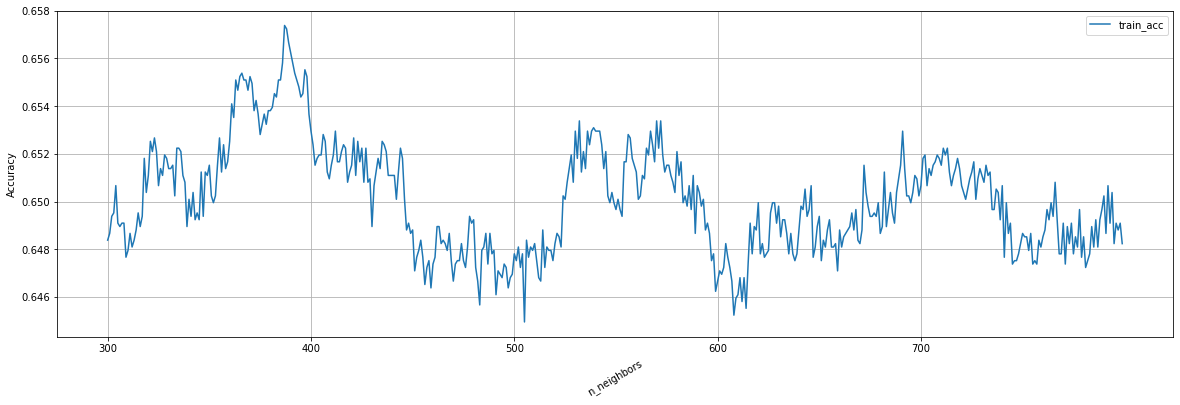

In [1418]:
# 하이퍼 파라미터 튜닝의 결과의 시각화 
plt.figure(figsize=(20,6))
plt.plot(range(300,800), train_list, label = "train_acc") #acc 정확도의 줄임말 

plt.grid()
plt.xticks(range(300, 800, 100))
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors", rotation = 30)
plt.legend()
plt.show()

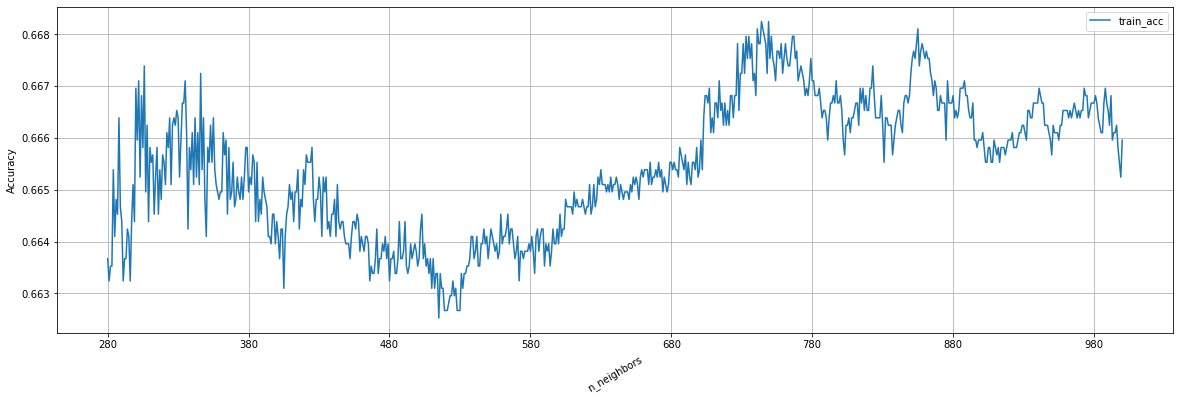

In [148]:
# 하이퍼 파라미터 튜닝의 결과의 시각화 
plt.figure(figsize=(20,6))
plt.plot(range(280,1001), train_list1, label = "train_acc") #acc 정확도의 줄임말 

plt.grid()
plt.xticks(range(280,1001,100))
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors", rotation = 30)
plt.legend()
plt.show()

In [920]:
knn_model = KNeighborsClassifier(n_neighbors=870) ## 양호 #8521

In [921]:
knn_model = KNeighborsClassifier() 

In [922]:
knn_model.fit(transform_X_train, Y_train)

KNeighborsClassifier()

In [923]:
result_knn= cross_val_score(knn_model, transform_X_train,
                            Y_train, cv=5)
result_knn

array([0.62214286, 0.62357143, 0.62      , 0.65642857, 0.63187991])

In [924]:
result_knn.mean()

0.6308045542734606

In [197]:
pre_ran = knn_model.predict(transform_X_test)
pre_ran

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [198]:
from sklearn.model_selection import train_test_split 

In [199]:
X_train_0, X_test1_0, Y_train1_0, Y_test1_0 = train_test_split(transform_X_train, Y_train3, 
                                                        test_size =0.1, random_state=80)

In [200]:
knn_model_1 = KNeighborsClassifier()

In [201]:
knn_model_1.fit(X_train_0, Y_train1_0)

KNeighborsClassifier()

In [202]:
result_knn_training= cross_val_score(knn_model_1, X_train_0,
                            Y_train1_0, cv=5)

In [203]:
result_knn_training.mean()

0.6262907069102462

In [204]:
knn_model_1.fit(X_test1_0, Y_test1_0)

KNeighborsClassifier()

In [206]:
result_knn_test= cross_val_score(knn_model_1, X_test1_0,
                             Y_test1_0, cv=5)

In [207]:
result_knn_test

array([0.57857143, 0.6       , 0.6       , 0.6       , 0.59285714])

In [208]:
Y_test1_0.info()

<class 'pandas.core.series.Series'>
Int64Index: 700 entries, 1495 to 4100
Series name: Reached.on.Time_Y.N
Non-Null Count  Dtype
--------------  -----
700 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


In [210]:
result_knn_test.mean()

0.5942857142857143

In [5045]:
submit["Reached.on.Time_Y.N"]=pre_ran

In [5046]:
submit.to_csv("1109_4knn.csv", index=False)

### 의사 결정나무 

In [937]:
tree_model = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 12, min_samples_split=11)
tree_model.fit(transform_X_train, Y_train)


             
             # 'max_depth': 5, 'min_samples_leaf': 51, 'min_samples_split': 51

DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, min_samples_split=11)

In [938]:
result = cross_val_score(tree_model, transform_X_train,
                            Y_train, cv=5)

In [939]:
result

array([0.65071429, 0.65071429, 0.64785714, 0.66142857, 0.66904932])

In [940]:
result.mean()   #'max_depth': 5, 'min_samples_leaf': 42, 'min_samples_split': 21

0.6559527213315633

In [729]:
#최적의 하이퍼 파라미터 찾기 GridsSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(12,20),
              'min_samples_split' : range(1,101), 'min_samples_leaf': range(1,61) }
grid_dclf = GridSearchCV(tree_model, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, Y_train)

print("GridSearchCV 최적의 하이퍼 파라미터: ", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f} ".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행 
depredictions = best_dclf.predict(X_test)



KeyboardInterrupt: 

####  tree 모델 특성 중요도

In [941]:
fi=tree_model.feature_importances_

In [942]:
importance_df = pd.DataFrame(fi, index=X_train01.columns)
importance_df.sort_values(by= 0, ascending= False)
#odor_n 특성 선택까지 

ValueError: Shape of passed values is (25, 1), indices imply (19, 1)

In [695]:
tree_model_1 = DecisionTreeClassifier(max_depth= 6, min_samples_leaf= 42, min_samples_split= 11)
tree_model_1.fit(X_train01, Y_train01)
               #andom_state=46, max_depth=5, min_samples_leaf=12, min_samples_split=2

DecisionTreeClassifier(max_depth=6, min_samples_leaf=42, min_samples_split=11)

In [697]:
result_tree_training= cross_val_score(tree_model_1, X_train01,
                            Y_train01, cv=5)

In [698]:
result_tree_training

array([0.65428571, 0.66214286, 0.66928571, 0.66714286, 0.70050036])

In [699]:
result_tree_training.mean()

0.6706715000510568

In [536]:
result_tree_test= cross_val_score(tree_model_1, X_test1,
                            Y_test1, cv=5)

In [537]:
result_tree_test

array([0.62857143, 0.55      , 0.57857143, 0.7       , 0.67142857])

In [538]:
result_tree_test.mean()

0.6257142857142857

In [539]:
result_tree_test= cross_val_score(tree_model, X_test1,
                            Y_test1, cv=5)

In [540]:
result_tree_test.mean()

0.6257142857142857

In [541]:
tree_model_1.score(X_test1, Y_test1)

0.6671428571428571

In [542]:
tree_model_1.score(X_train1, Y_train1)

0.6716939196697889

In [543]:
pre_ran = tree_model_1.predict(X_test)
pre_ran

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
submit["Reached.on.Time_Y.N"]=pre_ran

In [545]:
submit.to_csv("1110__3.csv", index=False)

### 랜덤포레스트

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_model = RandomForestClassifier()

In [60]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [61]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , Y_train)
    result = gscv.best_params_
    return result

In [1434]:
gs_rf = RandomForestClassifier(criterion = "gini", max_depth= 8, max_features= 'auto', min_samples_split= 8, n_estimators= 600)
rf_params = {
 'n_estimators': [600, 610],
 'criterion': ('gini','entropy'),
 'max_depth': [ 8, 9, 10],
 'min_samples_split': [6,7, 8],
 'max_features': ("auto", "sqrt", "log2") }
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 600}


In [62]:
gs_rf = RandomForestClassifier(criterion = "gini", max_depth= 8, max_features= 'auto', min_samples_split= 8, n_estimators= 600)

In [64]:
result

array([0.66142857, 0.65714286, 0.64928571, 0.67285714, 0.68406004])

In [65]:
result.mean()

0.6649548657204125

In [949]:
result_rf_model_training= cross_val_score(rf_model_1, X_train1,
                            Y_train1, cv=5)

NameError: name 'rf_model_1' is not defined

In [1071]:
result_rf_model_training

array([0.6452381 , 0.6297619 , 0.63214286, 0.66190476, 0.61978546])

In [1072]:
result_rf_model_training.mean()

0.6377666155854474

In [1073]:
result_rf_model_test= cross_val_score(rf_model_1, X_test1,
                            Y_test1, cv=5)

In [1077]:
result_rf_model_test

array([0.625     , 0.625     , 0.63928571, 0.61785714, 0.62857143])

In [1075]:
result_rf_model_test.mean()

0.6271428571428571

In [1088]:
rf_model_1.score(X_train1, Y_train1)

0.9168849726125268

In [1089]:
rf_model_1.score(X_test1, Y_test1)

0.6303571428571428

In [380]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(6,10),
              'min_samples_split' : range(1,20), 'min_samples_leaf': range(1,11), 
              'n_estimators' : range(100,125)}
rf_clf = RandomForestClassifier()

grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_dclf.fit(X_train, Y_train)

print("GridSearchCV 최적의 하이퍼 파라미터: ", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f} ".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_




KeyboardInterrupt: 

In [950]:
from sklearn.linear_model import LogisticRegression

In [952]:
lg_clf = LogisticRegression(solver=solver, max_iter=1000)

In [951]:
solvers= ['lbfgs', 'liblinear', 'newton-cg', "sag", 'saga']

In [953]:
for solver in solvers:
    lg_clf = LogisticRegression()
    lg_clf.fit(transform_X_train, Y_train)
    lg_preds = lg_clf.predict(transform_X_test)
    result = cross_val_score( lg_clf, transform_X_train,
                            Y_train, cv=5)
    print(solver, result.mean())

lbfgs 0.6489513938527519
liblinear 0.6489513938527519
newton-cg 0.6489513938527519
sag 0.6489513938527519
saga 0.6489513938527519


In [955]:
lg_clf.score(X_train, Y_train)

0.6623803400485784

In [1085]:
lg_clf.score(X_test1, Y_test1)

0.6182142857142857

## 에이다 부스트 

In [ ]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train_x , Y_train)
    result = gscv.best_params_
    return result

In [1087]:
# 모델 import 
from sklearn.ensemble import AdaBoostClassifier

In [1088]:
gs_adb = AdaBoostClassifier(random_state = 0)
adb_params ={
    'n_estimators':[10, 50, 100, 250, 500, 1000],
    'learning_rate':[0.001, 0.01, 0.1, 1]}
print(f'Best parameters for AdaBoost: ', gridsearch(gs_adb , adb_params))

Best parameters for AdaBoost:  {'learning_rate': 0.01, 'n_estimators': 1000}


In [1089]:
rs= cross_val_score(gs_adb, X_train_x, Y_train, cv=5)
rs.mean()

0.6450936383130809

In [1090]:
rs

array([0.64785714, 0.63857143, 0.63285714, 0.65071429, 0.65546819])

In [ ]:
ada_model.fit(X_train, Y_train)

### lgb 모델 

In [66]:
from lightgbm import LGBMClassifier

In [113]:
lgb_model = LGBMClassifier(learning_rate= 0.18, max_depth= 3, n_estimators=50, random_state= 1)

In [114]:
lgb_model.fit(X_train, Y_train)

LGBMClassifier(learning_rate=0.18, max_depth=3, n_estimators=50, random_state=1)

In [115]:
result = cross_val_score(lgb_model, X_train,
                            Y_train, cv=5)

In [119]:
pre_ran = lgb_model.predict(X_test)
pre_ran

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
submit["Reached.on.Time_Y.N"]=pre_ran

In [121]:
submit.to_csv("1111_final.csv", index=False)

In [5472]:
submit.to_csv("submit1109_9.csv", index=False)

In [1133]:
from sklearn.model_selection import GridSearchCV

#튜닝할 매개변수 결정,
lgb_model = LGBMClassifier()
params = {'n_estimators': range(50, 1000, 50),
          "max_depth" : [2],
          "learning_rate" : [ 0.01, 0.02, 0.05, 0.03, 0.1, 0.2 ],
          'colsample_bytree': [0.7, 0.8, 0.9, 1],
          'n_jobs' : [-1], 
          }
#모델 생성
# 위에서 만든 lgb_model 사용 
#gridSearchCV 객체를 생성 
grid = GridSearchCV(lgb_model, 
             params, 
             cv=5,
             scoring = "accuracy")
# GridSearchCV 모델 훈련 / 학습 시간이 오래걸릴 수 있다. 
grid.fit(X_train_x, Y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1],
                         'learning_rate': [0.01, 0.02, 0.05, 0.03, 0.1, 0.2],
                         'max_depth': [2], 'n_estimators': range(50, 1000, 50),
                         'n_jobs': [-1]},
             scoring='accuracy')

In [1134]:
print(grid.best_score_)  
print(grid.best_params_)

0.6678117022362913
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'n_jobs': -1}


features 
 [24 31 45  8  3  0 17 25 25 20 11  9  2 30  0]


df1                         importances
Customer_care_calls              24
Customer_rating                  31
Prior_purchases                  45
Product_importance                8
Discount_label_10미만               3
Discount_label_10                 0
Discount_label_10초과              17
WD_label_60000이하                 25
Weight_label_1001~2000           25
Weight_label_2001~4000           20
Weight_label_4001~               11
Cost_label_0                      9
Cost_label_1                      2
Cost_label_2                     30
Cost_label_3                      0


df2                         importances
Prior_purchases                  45
Customer_rating                  31
Cost_label_2                     30
WD_label_60000이하                 25
Weight_label_1001~2000           25
Customer_care_calls              24
Weight_label_2001~4000           20
Discount_label_10초과              17
Weight_label_4001~            

<AxesSubplot:>

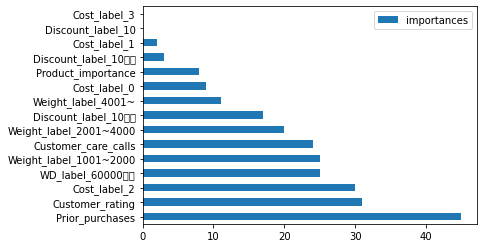

In [1399]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

# Gbm 완성하기 
model_best = LGBMClassifier(learning_rate= 0.2, max_depth= 3, n_estimators= 38)
# model 훈련하기 
model_best.fit(X_train, Y_train)

# feature_importance_를 이용해서 영향력이 높은 특성을 알아보기 
feature = model_best.feature_
print("features \n", feature)
print("\n")
# 영향력이 높은 모델의 특성을 데이터 프레임화 시키기 
df1 =pd.DataFrame(feature, index= X_train.columns, columns=["importances"])
print("df1", df1.head(20))
print("\n")

#위의 데이터 프레임을 내림차순으로 정렬하기 
# by = importances ascending = False 
df2 = df1.sort_values(by="importances", ascending=False)
print("df2", df2.head(15))
print("\n")
df3= df2.head(15)
print("df3", df2.head(27))
df3.plot.barh()

In [1196]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_care_calls     6999 non-null   float64
 1   Customer_rating         6999 non-null   int64  
 2   Prior_purchases         6999 non-null   float64
 3   Product_importance      6999 non-null   float64
 4   Discount_label_10미만     6999 non-null   uint8  
 5   Discount_label_10       6999 non-null   uint8  
 6   Discount_label_10초과     6999 non-null   uint8  
 7   WD_label_60000이하        6999 non-null   uint8  
 8   Weight_label_1001~2000  6999 non-null   uint8  
 9   Weight_label_2001~4000  6999 non-null   uint8  
 10  Weight_label_4001~      6999 non-null   uint8  
 11  Cost_label_0            6999 non-null   uint8  
 12  Cost_label_1            6999 non-null   uint8  
 13  Cost_label_2            6999 non-null   uint8  
 14  Cost_label_3            6999 non-null   

In [1415]:

train_list =[]
neighbors_settings = tqdm(range(300,800))
# 1~50까지 값을 neighbors_setting변수 저장 


for k in neighbors_settings :
    # 모델 생성 
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습 
    knn_clf.fit(transform_X_train, Y_train)
    #테스트 데이터를 이용한 예측 
    test_pre = knn_clf.predict(transform_X_test)
    test_score =  cross_val_score(knn_clf, transform_X_train,
                            Y_train, cv=5)
    train_list.append(test_score.mean())

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [18:29<00:00,  2.22s/it]


In [1423]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , Y_train)
    result = gscv.best_params_
    return result

In [1441]:
xgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[100,300, 50],
              'learning_rate':[0.1,0.2, 0.05]} 
print(f'Best parameters for XGBoost: ', gridsearch(xgb_gs , xgb_params))

Best parameters for XGBoost:  {'learning_rate': 0.05, 'n_estimators': 50}


In [75]:
from xgboost import XGBClassifier

In [85]:
xgb_model = XGBClassifier(learning_rate= 0.2, max_depth= 3, n_estimators=38 ).fit(X_train, Y_train)

In [81]:
result= cross_val_score(xgb_model, X_train, Y_train, cv=5)

In [1411]:
xgb_model = XGBClassifier(n_estimators=38, learning_rate=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV

#튜닝할 매개변수 결정
params = {'n_estimators': range(1, 101, 1),
          "max_depth" : [3,4,5,2],
          "learning_rate" : [0.1,0.2,0.01,0.05, 0.1],
          'colsample_bytree': [ 1]
          }
#모델 생성
# 위에서 만든 lgb_model 사용 

#gridSearchCV 객체를 생성 
grid = GridSearchCV(xgb_model, 
             params, 
             cv=5,
             scoring = "accuracy")
# GridSearchCV 모델 훈련 / 학습 시간이 오래걸릴 수 있다. 
grid.fit(X_train, Y_train)

In [ ]:


# 미리 사용할 알고리즘을 fit 해야한다
xgb_model = XGBClassifier(learning_rate= 0.2, max_depth= 3, n_estimators=38 ).fit(X_train, Y_train)

perm = PermutationImportance(lgb_model, scoring = "accuracy", random_state = 97).fit(X_train, Y_train) 
eli5.show_weights(perm, top = 25, feature_names = X_train.columns.tolist())

In [1412]:
result = cross_val_score(xgb_model, X_train,
                            Y_train, cv=5)

In [6859]:
pre_xgb = xgb_model.predict(X_test)
pre_xgb

array([0, 1, 0, ..., 0, 1, 0])

In [6860]:
submit["Reached.on.Time_Y.N"]=pre_xgb

In [6862]:
submit.to_csv("submit1107_5.csv", index=False)

In [6692]:
result = cross_val_score(final, X_train,
                            Y_train, cv=10)

In [90]:
from sklearn.ensemble  import VotingClassifier 

In [91]:
# Voting 모델 생성하기 
voting_hard = VotingClassifier(estimators=estimators, voting ='hard') 

In [92]:
result= cross_val_score(voting_hard, X_train, Y_train, cv=5)
result

array([0.66      , 0.66285714, 0.65285714, 0.66571429, 0.67405289])

In [97]:
voting_hard.fit(X_train, Y_train)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(learning_rate=0.2, max_depth=3,
                                             n_estimators=38, random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow...
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='d

In [98]:
pre_final =voting_hard.predict(X_test)
pre_final

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
submit["Reached.on.Time_Y.N"]=pre_final

In [99]:
submit.to_csv("submit1111_final.csv", index=False)

In [102]:
pre_final

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import GridSearchCV

#튜닝할 매개변수 결정
params = {'n_estimators': [1000, 500, 1500, 2000],
          "max_depth" : [1,2,3,4,5],
          "learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
          "random_state" : [1,2,3,4,5] }
#모델 생성
# 위에서 만든 lgb_model 사용 

#gridSearchCV 객체를 생성 
grid = GridSearchCV(lgb_model, 
             params, 
             cv=5,
             scoring = "accuracy")
# GridSearchCV 모델 훈련 / 학습 시간이 오래걸릴 수 있다. 
grid.fit(X_train, Y_train)

In [6025]:
print(grid.best_score_)
print(grid.best_params_)

0.6680978249770244
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 48, 'random_state': 1}


In [6026]:
pre_xgb = grid.predict(X_test)
pre_xgb

array([0, 1, 0, ..., 0, 0, 0])

In [2202]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

# Gbm 완성하기 
model_best = LGBMClassifier(learning_rate=0.3, max_depth=3, n_estimators=50, random_state=1)
# model 훈련하기 
model_best.fit(X_train, Y_train)

# feature_importance_를 이용해서 영향력이 높은 특성을 알아보기 
feature = model_best.feature_importances_
print("features \n", feature)
print("\n")
# 영향력이 높은 모델의 특성을 데이터 프레임화 시키기 
df1 =pd.DataFrame(feature, index= train, columns=["importances"])
print("df1", df1.head(3))
print("\n")

#위의 데이터 프레임을 내림차순으로 정렬하기 
# by = importances ascending = False 
df2 = df1.sort_values(by="importances", ascending=False)
print("df2", df2.head(10))
print("\n")
df3= df2.head(10)
print("df3", df2.head(3))
df3.plot.barh()


features 
 [12 18 98 31  7 47 83  0 12  3  0  0  0  0  4  0  0  2  0  0  0  5  2  1
  1  3  1]




ValueError: Shape of passed values is (27, 1), indices imply (6999, 1)

In [4609]:
# 스태킹 모델 생성 


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수 
def get_stacking_base_datasets(model, X_train_n, Y_train_n, X_test_n, n_folds):
    #지정된 n_fold값으로 kFold 생성 
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0,1]))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model._class_._name_,' model 시작')
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출 
        print('\t 폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        Y_tr= Y_train_n[train_index]
        X_te= X_train_n[valid_index]
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행 
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장 
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴으 세트 내 학습된 기반 모델에서 예측 후 데이터 저장 
        test_pred[:, folder_counter]= model.predict(X_test_n)
    #폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트데이터로 생성    
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터 
    return train_fold_pred, test_pred_mean
        